# Machine Learning and Statistics Assignment Part 2 - scipy-stats
---

![scikit_logo](Images/scipy_logo.png)

[scipy.stats documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)

### One Way ANOVA

In [12]:
# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns

# Stats.
import scipy.stats as ss

# Numerical arrays.
import numpy as np

# Collections.
import collections as co

# Specials.
import scipy.special as spec

### Example: The Wine dataset

In [13]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

In [14]:
df.columns = ['name','alcohol','malicAcid','ash','ashalcalinity','magnesium','totalPhenols','flavanoids'
              ,'nonFlavanoidPhenols','proanthocyanins','colorIntensity','hue','od280_od315','proline']
df

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Assumption 1: Dependent variable

In [15]:
dependent = df['alcohol']
dependent

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64

In [16]:
dependent.describe()

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: alcohol, dtype: float64

### Assumption 2: Independent variable

In [29]:
independent = df['name']
independent

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: name, Length: 178, dtype: int64

### Assumption 4: Outliers

<AxesSubplot:xlabel='alcohol', ylabel='name'>

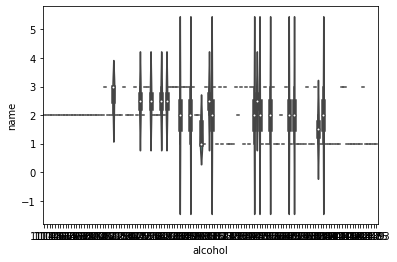

In [33]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.violinplot(x=dependent, y=independent)

### Assumption 5: Normality  

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php

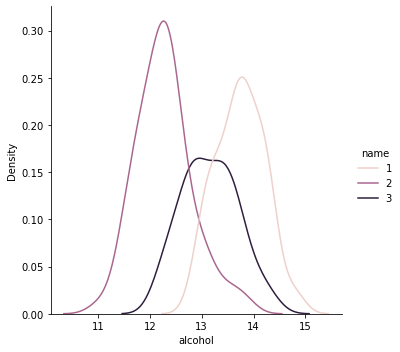

In [19]:
# KDEs of the three categories.
sns.displot(x=dependent, hue=independent, kind="kde")

In [21]:
ss.shapiro(dependent[independent == 1])

ShapiroResult(statistic=0.9808937311172485, pvalue=0.47905755043029785)

In [22]:
ss.shapiro(dependent[independent == 2])

ShapiroResult(statistic=0.9720516800880432, pvalue=0.11396162211894989)

In [23]:
ss.shapiro(dependent[independent == 3])

ShapiroResult(statistic=0.981467604637146, pvalue=0.6408376097679138)

### Assumption 6: Homogeneity of Variances  

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php

In [24]:
# Test for equal variances.
ss.levene(
    dependent[independent == 1],
    dependent[independent == 2],
    dependent[independent == 3]
)

LeveneResult(statistic=0.5997889815519192, pvalue=0.5500519055097621)

### One-way ANOVA

In [25]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 1],
    dependent[independent == 2],
    dependent[independent == 3]
)

F_onewayResult(statistic=135.07762424279912, pvalue=3.319503795619655e-36)

Conclusion: the mean sepal lengths of setosas, versicolors, and virginicas are different.

## REFERENCES
---

[scipy.stats documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)

# END